In [1]:
%load_ext pyinstrument

# Generating Synthetic Power Grids topologies using ERG 

In [2]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")

import load_pglib_opf as lp
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pg_utils as sc
from tqdm import tqdm
import pg_ergm_eest as est
import pg_ham_comp as hc
import matplotlib.pylab as pylab

### Reference Grid selection

In the next cell we select the model type as well as the reference grid

In [3]:
mod_type = '_edg_tri_2tri'
obs_comp = getattr(hc,'obs'+mod_type)
fast_obs_comp = getattr(hc,'fast_obs'+mod_type)
name='300_ieee'
rmean_list=[]

In [4]:
#create file used to store the estimation results
file = open("data3_"+name+mod_type+".txt", "w")
file.write("Simulation data on grid "+name+" for model "+mod_type+"\n")

#parsing the .m file into a suitable format, and perform some sanity checks
ordmat,ordlist,buslist,countlist = lp.pow_parser(name)
print("Number of connecetd components in the graph:" ,nx.number_connected_components(nx.from_numpy_array(ordmat)))
k1,k2,k3,q1,q2,q3 = hc.avg_degreetype(ordmat,ordlist)
genobs = hc.obs_edg_tri_2tri(ordmat,q1,q2,q3)
countlist = [q1,q2,q3]
print(countlist)

Number of connecetd components in the graph: 1
[69, 204, 27]


### Parameter Estimation

In the following we generate a starting point for the betas estimation. The EE method works in principle with any starting point, provided that is 'close enough' to the target point. Our experiments showed that the algorithm converges if the parameters in the starting point have the same sign and are of the same order of magnitude as the real ones. Thus, in the following cell we compute, among other quantities, the analytical value of the (edge-)parameters according to the free-energy partial derivatives (see https://doi.org/10.48550/arXiv.1210.7828). For the k-triangle count parameters we use an educated guess.

In [5]:

obs,betas = hc.comp_obs_and_betas(mod_type,ordmat,ordlist,countlist,startguess=np.array([1, -1]))
n = len(ordmat)
startconn1 = est.generate_connected_adj(n)
randper = np.random.permutation(n)
startconn = est.reorder_rows(startconn1,randper)
mix = n*n*np.log(n)
print(betas)
step = int(n/3)

100%|██████████| 3000/3000 [00:03<00:00, 759.46it/s] 


no convergence
7.823457943191602
109.33631641813899
8.804002578262704
239.02493893209592
35.07778341153988
6.963947312661273
[-6.27  -5.335 -5.885 -4.895 -5.555 -4.29   1.    -1.   ]


To better visualize how the algorithm work we choose as a starting point an educated guess of sign and magnitude of each parameter based on the previous estimation.

In [6]:
%%pyinstrument
#estimate the betas using Equilibrium Expectation
betas = np.array([-2,-2,-2,-2,-2,-2,1,-1], dtype=float)
EEparams,obslist,parlist = est.EEsparse(ordmat,obs,betas,countlist,obs_comp,fast_obs_comp,100000,0.001,0.001,step)

  7%|▋         | 6509/100000 [00:06<00:25, 3631.27it/s]

[-2.01807217 -2.01807217 -2.01807217 -2.01807217 -2.01807217 -2.00801
  0.99103592 -1.00702104]


 12%|█▏        | 11926/100000 [00:09<00:54, 1602.16it/s]

[-2.03630764 -2.03630764 -2.03630764 -2.03630764 -2.03630764 -2.02615455
  0.98215219 -1.01612056]


 19%|█▉        | 19390/100000 [00:11<00:29, 2747.80it/s]

[-2.05470789 -2.05470789 -2.05470789 -2.05470789 -2.05470789 -2.04446305
  0.97334809 -1.02530231]


 30%|██▉       | 29915/100000 [00:16<00:30, 2306.13it/s]

[-2.0732744  -2.0732744  -2.0732744  -2.0732744  -2.0732744  -2.06293699
  0.96462292 -1.03456703]


 46%|████▌     | 45750/100000 [00:23<00:25, 2161.62it/s]

[-2.09200868 -2.09200868 -2.09200868 -2.09200868 -2.09200868 -2.08157786
  0.95597596 -1.04391547]


 60%|█████▉    | 59979/100000 [00:31<00:17, 2237.73it/s]

[-2.11091225 -2.11091225 -2.11091225 -2.11091225 -2.11091225 -2.10038718
  0.94740651 -1.05334837]


 72%|███████▏  | 72147/100000 [00:37<00:14, 1899.31it/s]

[-2.12998663 -2.12998663 -2.12998663 -2.12998663 -2.12998663 -2.11936645
  0.93891388 -1.06286652]


 98%|█████████▊| 98300/100000 [00:52<00:01, 1247.06it/s]

[-2.14923337 -2.14923337 -2.14923337 -2.14923337 -2.14923337 -2.13851722
  0.93049737 -1.07247067]


100%|██████████| 100000/100000 [00:53<00:00, 1872.57it/s]


1662


_     ._   __/__   _ _  _  _ _/_   Recorded: 16:45:52  Samples:  49060
 /_//_/// /_\ / //_// / //_'/ //     Duration: 65.669    CPU time: 47.109
/   _/                      v4.6.2

Program: c:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py --f=c:\Users\franc\AppData\Roaming\jupyter\runtime\kernel-v2-27388bTPUH1je5wZ0.json

65.669 <module>  ..\AppData\Local\Temp\ipykernel_8504\2784382301.py:2
|- 56.095 EEsparse  pg_ergm_eest.py:88
|  |- 20.392 csr_matrix.__init__  scipy\sparse\compressed.py:27
|  |  |- 16.357 coo_matrix.__init__  scipy\sparse\coo.py:126
|  |  |  `- 15.820 ndarray.nonzero  <built-in>
|  |  |- 2.851 csr_matrix.__init__  scipy\sparse\compressed.py:27
|  |  |  |- 1.983 coo_matrix.asformat  scipy\sparse\base.py:294
|  |  |  |  `- 1.964 coo_matrix.tocsr  scipy\sparse\coo.py:372
|  |  |  |     `- 1.080 csr_matrix.__init__  scipy\sparse\compressed.py:27
|  |  |  `- 0.685 csr_matrix.check_format  scipy\sparse\compressed.py:136
|  |  `- 0.687 csr_matrix.check_format  scipy\sparse\compressed.py:136
|  |- 10.130 fast_obs_edg_tri_2tri  pg_ham_comp.py:223
|  |  |- 2.989 CPUDispatcher._compile_for_args  numba\core\dispatcher.py:388
|  |  |     [39 frames hidden]  numba
|  |  |- 2.846 copy  copy.py:66
|  |  |     [3 frames hidden]  copy, <built-in>
|  |  |- 2.784 [self]  pg_ham_comp.py
|  |  `- 1.210 change_triang3  pg_ham_comp.py:78
|  |- 7.232 [self]  pg_ergm_eest.py
|  |- 4.917 change_element2  pg_ergm_eest.py:44
|  |  |- 3.652 random_element  pg_ergm_eest.py:36
|  |  |  `- 3.274 RandomState.randint  <built-in>
|  |  `- 1.265 [self]  pg_ergm_eest.py
|  |- 4.719 LiftedLoop._compile_for_args  numba\core\dispatcher.py:388
|  |     [64 frames hidden]  numba
|  |- 1.874 csc_matrix.tocsr  scipy\sparse\csc.py:134
|  |  `- 0.958 csr_matrix.__init__  scipy\sparse\compressed.py:27
|  |- 1.608 csr_matrix.__getattr__  scipy\sparse\base.py:673
|  |  `- 1.572 csr_matrix.transpose  scipy\sparse\csr.py:135
|  |     `- 1.352 csc_matrix.__init__  scipy\sparse\compressed.py:27
|  |- 1.534 tqdm.__iter__  tqdm\std.py:1157
|  |     [11 frames hidden]  tqdm, ipykernel, threading, <built-in>
|  |- 1.462 dtype_ham  pg_ergm_eest.py:32
|  |- 1.257 validate_graph  scipy\sparse\csgraph\_validation.py:9
|  |  `- 1.130 csr_matrix.__init__  scipy\sparse\compressed.py:27
|  |     `- 0.836 csr_matrix.check_format  scipy\sparse\compressed.py:136
|  `- 0.775 compute_p  pg_ergm_eest.py:52
`- 9.574 CPUDispatcher._compile_for_args  numba\core\dispatcher.py:388
      [58 frames hidden]  numba, llvmlite

We now show the stochastic trajectory of each parameter's updates. Notice how upon reaching convergence the parameters start to oscillate.

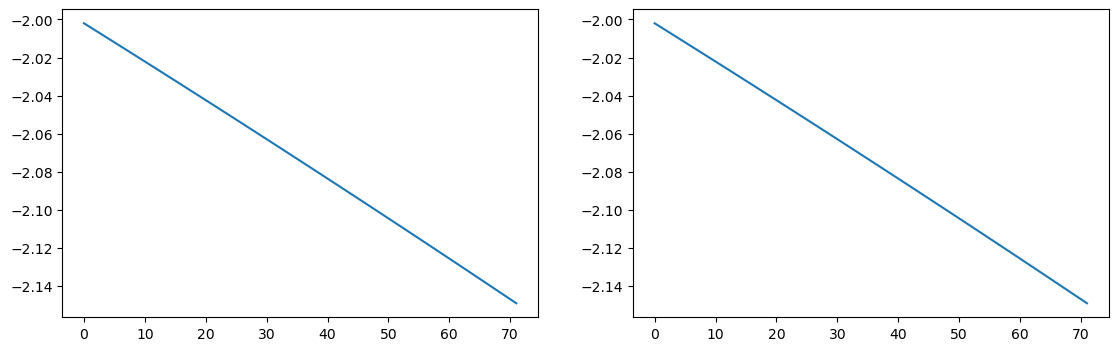

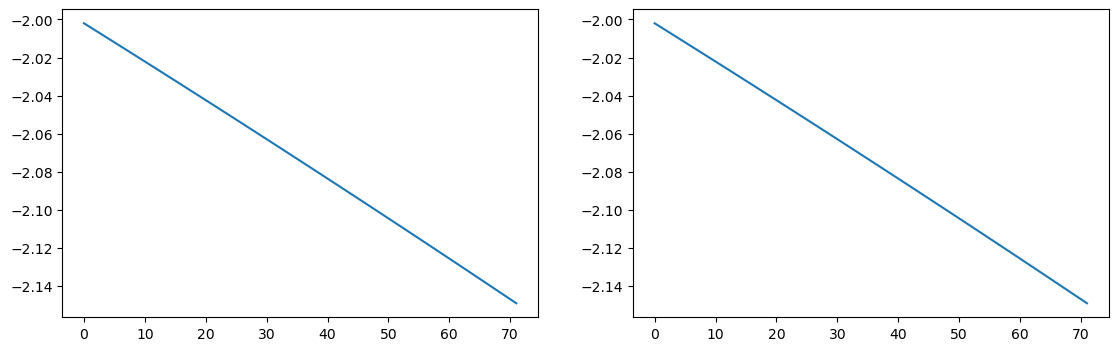

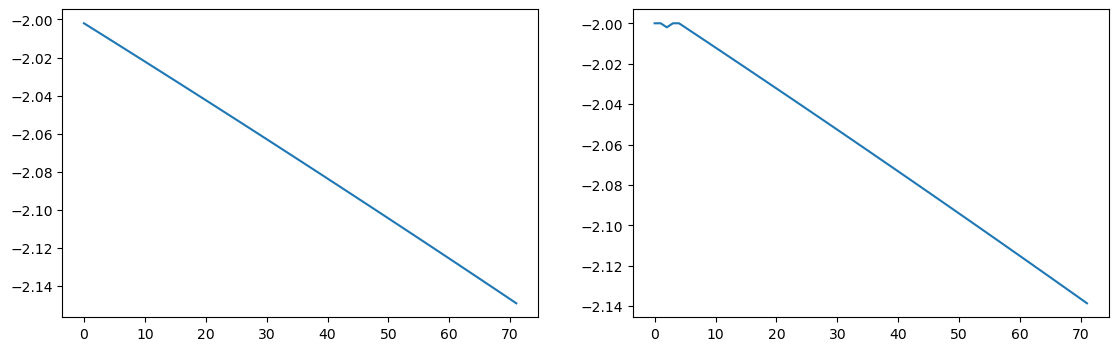

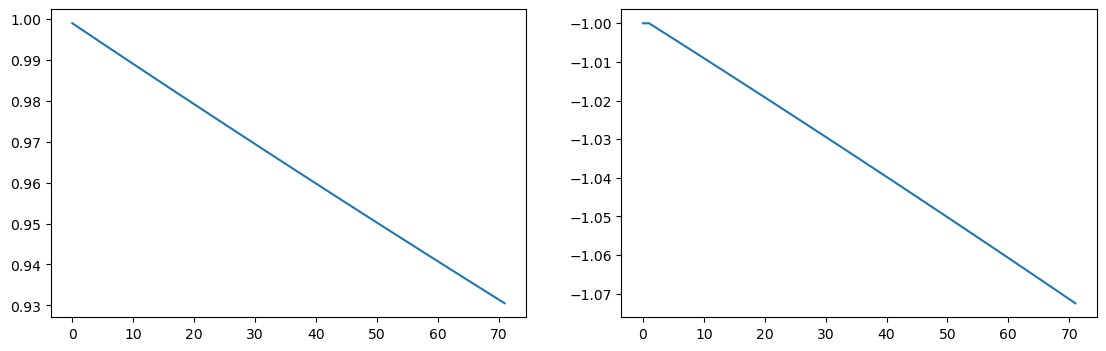

In [7]:
#plotting the parameters' trajectories during the EE algorithm

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols= 2, figsize=(13.5,4))
#ax0.set_title("Generator-Generator Edge parameter", fontsize = 20)
ax0.plot(parlist[0])
#ax1.set_title("Generator-Load Edge parameter", fontsize = 20)
ax1.plot(parlist[1])
plt.savefig("nt"+mod_type+name+'parmater diagnostics0.svg',dpi=300, format="svg")
plt.show()
fig, (ax2,ax3) = plt.subplots(nrows=1,ncols= 2, figsize=(13.5,4))
#ax2.set_title("Generator-Interconnection Edge parameter", fontsize = 20)
ax2.plot(parlist[2])
#ax3.set_title("Load-Load Edge parameter", fontsize = 20)
ax3.plot(parlist[3])
plt.savefig("nt"+mod_type+name+'parmater diagnostics1.svg',dpi=300, format="svg")
plt.show()
fig,(ax4,ax5) = plt.subplots(nrows=1,ncols= 2, figsize=(13.5,4))
#ax4.set_title("Load-Interconnection Edge parameter", fontsize = 20)
ax4.plot(parlist[4])
#ax5.set_title("Interconnection-Interconnection Edge parameter", fontsize = 20)
ax5.plot(parlist[5])
plt.savefig("nt"+mod_type+name+'parmater diagnostics2.svg',dpi=300, format="svg")
plt.show()
fig2,(ax20,ax21) = plt.subplots(nrows=1,ncols=2,figsize=(13.5,4))
#ax20.set_title("triangles parameter", fontsize = 20)
ax20.plot(parlist[6])
#ax21.set_title("2-triangles parameter", fontsize = 20)
ax21.plot(parlist[7])
plt.savefig("nt"+mod_type+name+'parmater diagnostics3.svg',dpi=300, format="svg")
plt.show()

In [8]:
file.write("The estimation resulted in the following parameters: \n"+str(list(EEparams))+"\n")

222

### Constrained Monte-Carlo sampling

We proceed to the actual generative part of our methodology by using the parameters estimated previously and the algorithm for constrained Monte-Carlo sampling introduced in https://doi.org/10.48550/arXiv.1806.11276

In [9]:
#monte-carlo sampling with the constrained algorithm
mean_list,synth,obslist = est.pg_MHergm_conn(startconn,obs,EEparams,countlist, obs_comp,fast_obs_comp,7000000)
sellist = est.selector(synth)
print("The procedure has generated "+str(len(sellist))+" synthetic samples")
Glist2,clustlist,avg_typedeg,ac_list = sc.synth_selection2(sellist,ordlist)

 28%|██▊       | 1930581/7000000 [23:52:01<72:40:30, 19.38it/s]       

2

In [ ]:
dataset = [sellist, feature_matrices]

Next, we plot some of the statiscs of interest for each generated network. In red it is reported the value of the statistic for the reference grid whereas in green it is reported the average value of the statistic across the generated ensemble.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


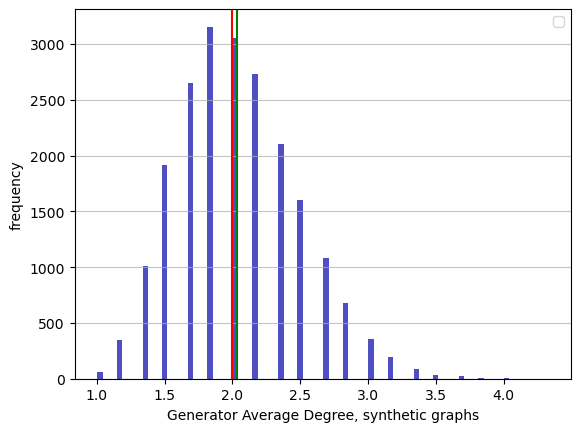

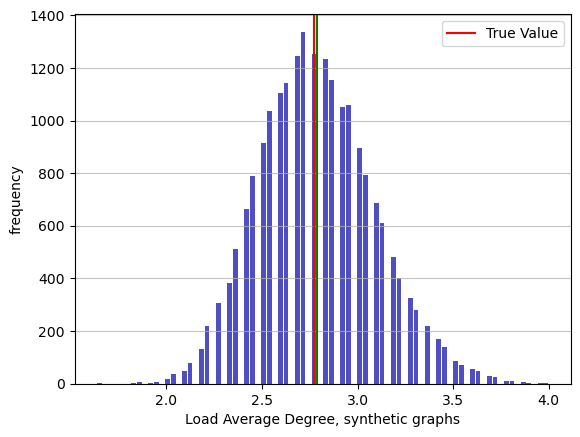

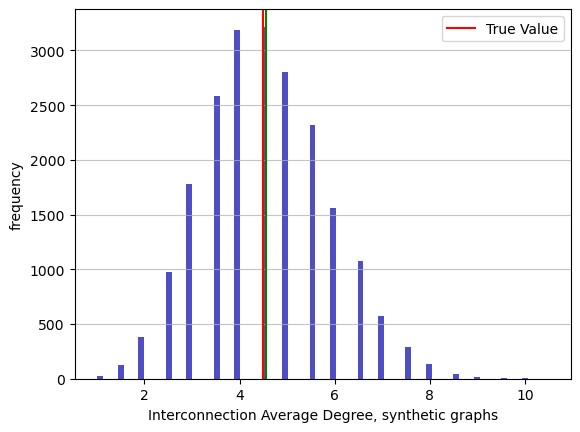

100%|██████████| 21104/21104 [00:01<00:00, 20838.38it/s]


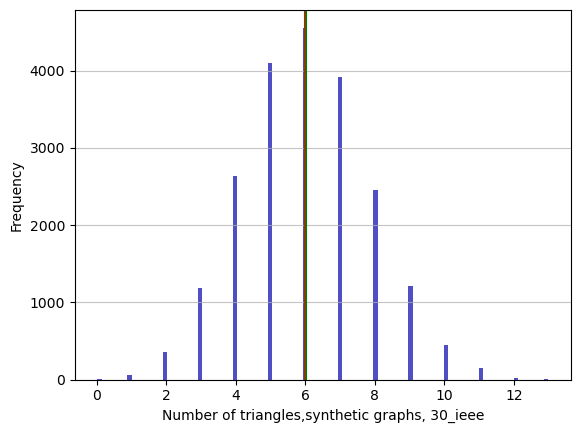

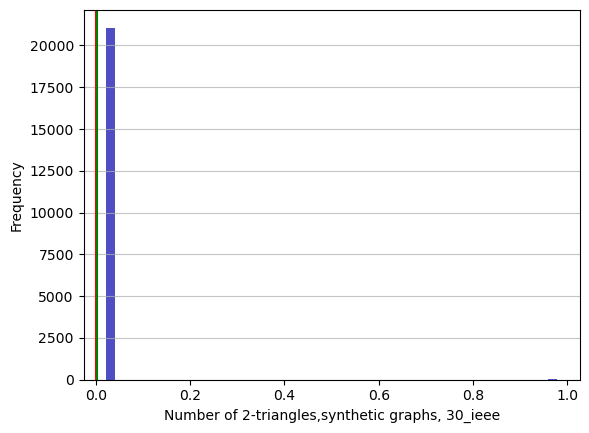

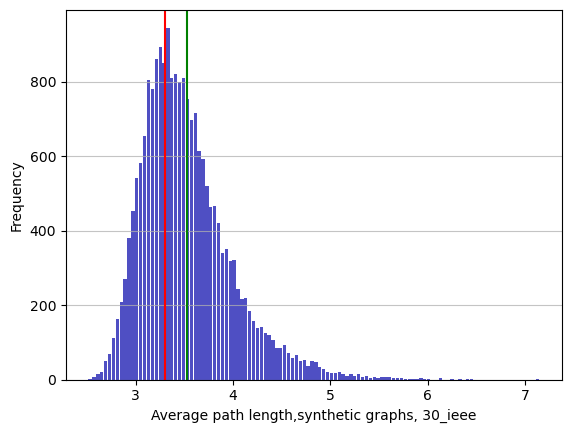

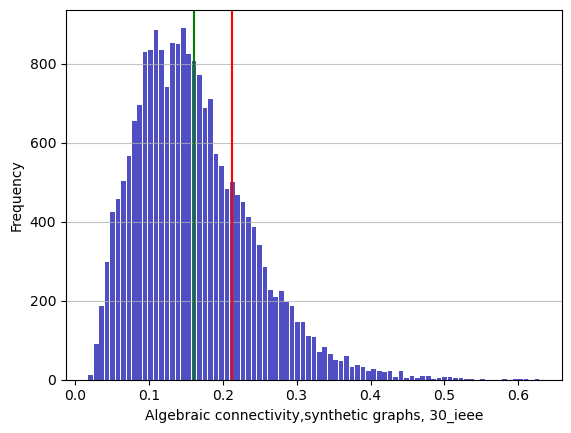

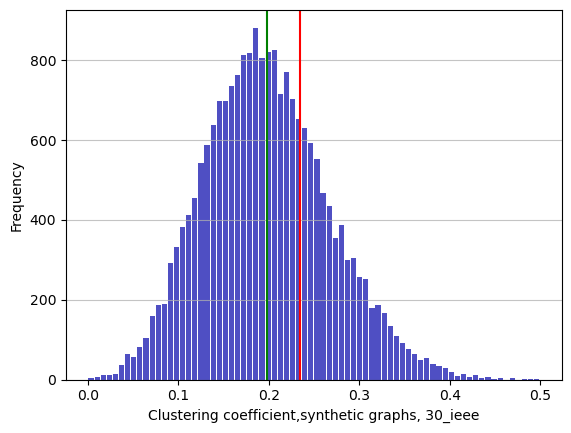

77

In [ ]:
#plotting the results

degarray = np.array(avg_typedeg).T

n, bins, patches = plt.hist(x=degarray[0], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Generator Average Degree, synthetic graphs')
plt.ylabel('frequency')
#plt.title('Generators,'+name)
plt.axvline(x=k1,color='red')
plt.axvline(x=np.mean(degarray[0]),color='green')
maxfreq = n.max()
plt.legend(loc='upper right')
plt.savefig('sdeggens'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(k1)

file.write("Generator Average Degree, benchmark value: "+ str(rmean_list[0])+"\n")

file.write("Generator Average Degree: mean "+ str(np.mean(degarray[0])) + " std dev "+ str(np.std(degarray[0])) + "\n" )





n, bins, patches = plt.hist(x=degarray[1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Load Average Degree, synthetic graphs')
plt.ylabel('frequency')
#plt.title('Loads, '+name)
plt.axvline(x=k2,color='red',label='True Value')
plt.axvline(x=np.mean(degarray[1]),color='green')
maxfreq = n.max()
plt.legend(loc='upper right')
plt.savefig('sdegloads'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(k2)

file.write("Load Average Degree, benchmark value: "+ str(rmean_list[1])+"\n")

file.write("Load Average Degree: mean "+ str(np.mean(degarray[1])) + " std dev "+ str(np.std(degarray[1])) + "\n" )


n, bins, patches = plt.hist(x=degarray[2], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Interconnection Average Degree, synthetic graphs')
plt.ylabel('frequency')
#plt.title('Interconnections, '+name)
plt.axvline(x=k3,color='red',label='True Value')
plt.axvline(x=np.mean(degarray[2]),color='green')
maxfreq = n.max()
plt.legend(loc='upper right')
plt.savefig('sdegints'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(k3)

file.write("Interconnection Average Degree, benchmark value: "+ str(rmean_list[2])+"\n")

file.write("Interconnection Average Degree: mean "+ str(np.mean(degarray[2])) + " std dev "+ str(np.std(degarray[2])) + "\n" )


trilist = []
for i in tqdm(range(len(Glist2))):
    trilist.append(sum(nx.triangles(Glist2[i].to_undirected()).values())/3)
trilist2 = [hc.compute_2_triangle(mat) for mat in tqdm(sellist)]


n, bins, patches = plt.hist(x=trilist, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of triangles,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Triangles, '+name)
plt.axvline(x=genobs[6],color='red')
plt.axvline(x=np.mean(trilist),color='green')
plt.savefig('stris'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(genobs[6])

file.write("Triangles, benchmark value: "+ str(rmean_list[3])+"\n")

file.write("Triangles: mean "+ str(np.mean(trilist)) + " std dev "+ str(np.std(trilist)) + "\n" )


n, bins, patches = plt.hist(x=trilist2, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.3)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of 2-triangles,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('2-Triangles, '+name)
plt.axvline(x=genobs[7],color='red')
plt.axvline(x=np.mean(trilist2),color='green')
plt.savefig('trians2'+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(genobs[7])
file.write("2-Triangles, benchmark value: "+ str(rmean_list[4])+"\n")
file.write("2-Triangles: mean "+ str(np.mean(trilist2)) + " std dev "+ str(np.std(trilist2)) + "\n" )



paths = [nx.average_shortest_path_length(G.to_undirected()) for G in Glist2]
n, bins, patches = plt.hist(x=paths, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Average path length,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Avgerage path, '+name)
plt.axvline(x=nx.average_shortest_path_length(nx.from_numpy_array(ordmat).to_undirected()),color='red')
plt.axvline(x=np.mean(paths),color='green')
plt.savefig('apl'+name+'.svg',dpi=300, format="svg")
plt.show()
rmean_list.append(nx.average_shortest_path_length(nx.from_numpy_array(ordmat).to_undirected()))
file.write("Average path length, benchmark value: "+ str(rmean_list[5])+"\n")
file.write("Average path length: mean "+ str(np.mean(paths)) + " std dev "+ str(np.std(paths)) + "\n" )




n, bins, patches = plt.hist(x=ac_list, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Algebraic connectivity,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Algebraic connectivity, '+name)
plt.axvline(x=sc.alg_conn(ordmat),color='red')
plt.axvline(x=np.mean(ac_list),color='green')
plt.savefig('acsin'+name+'.svg',dpi=300, format="svg")
plt.show()
rmean_list.append(sc.alg_conn(ordmat))
file.write("Algebraic connectivity, benchmark value: "+ str(rmean_list[6])+"\n")
file.write("Algebraic connectivity: mean "+ str(np.mean(ac_list)) + " std dev "+ str(np.std(ac_list)) + "\n" )




clusts = [sc.clustering_coeff(G.to_undirected()) for G in Glist2]
n, bins, patches = plt.hist(x=clusts, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Clustering coefficient,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Avgerage path, '+name)
plt.axvline(x=sc.clustering_coeff(nx.from_numpy_array(ordmat).to_undirected()),color='red')
plt.axvline(x=np.mean(clusts),color='green')
plt.savefig('clustcoeff_'+name+'.svg',dpi=300, format="svg")
plt.show()
rmean_list.append(sc.clustering_coeff(nx.from_numpy_array(ordmat).to_undirected()))
file.write("Clustering coefficient, benchmark value: "+ str(rmean_list[7])+"\n")
file.write("Clustering coefficient: mean "+ str(np.mean(clusts)) + " std dev "+ str(np.std(clusts)) + "\n" )



In [ ]:
file.close()

In [ ]:
import pickle
PIK = "graph_list_pickle.dat"

data = Glist2
with open(PIK, "wb") as f:
    pickle.dump(data, f)

In [ ]:
PIK = "graph_data_30_pickle.dat"

data = dataset
with open(PIK, "wb") as f:
    pickle.dump(data, f)